## Python speed

In [1]:
iterations = int(1e6)

In [2]:
%%time

import random
random.seed(0)
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(iterations):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0,1)*sqrt(T))
    values.append(ST)

sum(values) / len(values)

Wall time: 1.14 s


105.14868106504952

In [3]:
%%time
import numpy as np
np.random.seed(0)

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp(
    (r - 0.5 * sigma ** 2) * T
    + sigma * np.random.standard_normal(iterations) * np.sqrt(T)
)

ST.mean()

Wall time: 187 ms


105.15838743425905

In [4]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"

In [5]:
api_key = ""
with open("quandl_apikey.txt", "r") as target_file:
    api_key = target_file.read()

len(api_key) > 0

True

<AxesSubplot:title={'center':'BTC/USD Exchange Rate'}, xlabel='Date'>

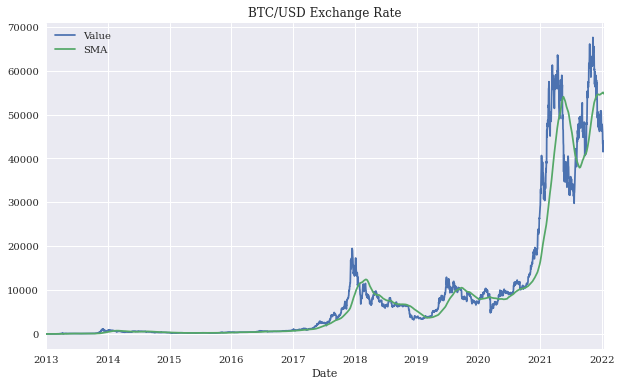

In [6]:
import quandl as q

q.ApiConfig.api_key = api_key
d = q.get("BCHAIN/MKPRU")
d["SMA"] = d["Value"].rolling(100).mean()
d.loc["2013-1-1":].plot(
    title="BTC/USD Exchange Rate",
    figsize=(10,6)
)

In [7]:
d.tail()

,Value,SMA
Date,,
2022-01-10,41864.44,54966.8800
2022-01-11,41849.00,54908.0990
2022-01-12,42723.37,54853.2755
2022-01-13,43926.00,54801.0960
2022-01-14,42546.44,54711.5021


***